In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset

breast_cancer_df = pd.read_csv('breast-cancer.csv')

# Display first 5 rows
print(breast_cancer_df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [2]:
# Display dataset information
breast_cancer_df.info()

# Statistical summary of numerical features
summary_statistics = breast_cancer_df.describe()
print(summary_statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Check for missing values
missing_values = breast_cancer_df.isnull().sum()
print("Missing Values:\n", missing_values)

# If any missing values exist, handle them
breast_cancer_df = breast_cancer_df.dropna()  # Drop missing values


Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


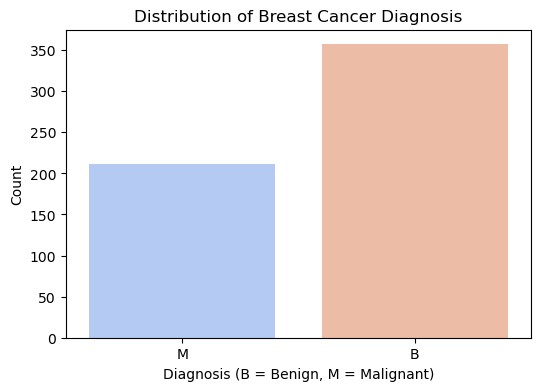

In [4]:
# Countplot for the diagnosis column
plt.figure(figsize=(6, 4))
sns.countplot(x=breast_cancer_df['diagnosis'], palette="coolwarm")
plt.title("Distribution of Breast Cancer Diagnosis")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()


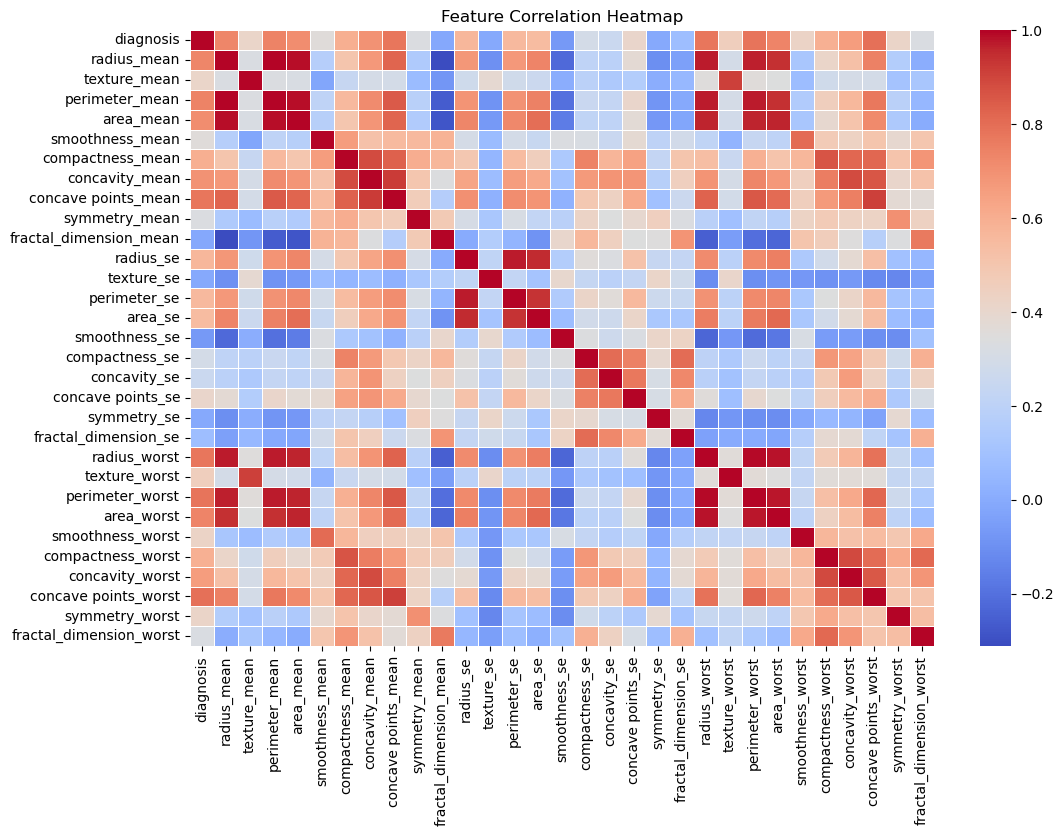

In [6]:
# Drop the 'id' column as it is irrelevant
breast_cancer_df = breast_cancer_df.drop(columns=['id'])

# Encode the 'diagnosis' column (M → 1, B → 0) if it is not already numeric
if breast_cancer_df['diagnosis'].dtype == 'object':
    label_encoder = LabelEncoder()
    breast_cancer_df['diagnosis'] = label_encoder.fit_transform(breast_cancer_df['diagnosis'])

# Compute correlation matrix again (now without string conversion issues)
correlation_matrix = breast_cancer_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Check for highly correlated features (absolute correlation > 0.9)
correlation_threshold = 0.9
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_name = correlation_matrix.columns[i]
            high_corr_features.add(feature_name)

print("Highly Correlated Features to Consider Dropping:", high_corr_features)

# Drop highly correlated features if needed (optional step)
breast_cancer_df = breast_cancer_df.drop(columns=high_corr_features)


Highly Correlated Features to Consider Dropping: {'perimeter_worst', 'concave points_mean', 'area_se', 'area_worst', 'radius_worst', 'area_mean', 'concave points_worst', 'texture_worst', 'perimeter_se', 'perimeter_mean'}


In [9]:
from sklearn.preprocessing import StandardScaler

# Extract feature columns (excluding 'diagnosis' column)
feature_columns = breast_cancer_df.columns[1:]  # All except target variable

# Initialize and apply StandardScaler
scaler = StandardScaler()
breast_cancer_df[feature_columns] = scaler.fit_transform(breast_cancer_df[feature_columns])

# Display processed dataset
print("Dataset after Feature Scaling:\n", breast_cancer_df.head())


Dataset after Feature Scaling:
    diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1     1.097064     -2.073335         1.568466          3.283515   
1          1     1.829821     -0.353632        -0.826962         -0.487072   
2          1     1.579888      0.456187         0.942210          1.052926   
3          1    -0.768909      0.253732         3.283553          3.402909   
4          1     1.750297     -1.151816         0.280372          0.539340   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0        2.652874       2.217515                2.255747   2.489734   
1       -0.023846       0.001392               -0.868652   0.499255   
2        1.363478       0.939685               -0.398008   1.228676   
3        1.915897       2.867383                4.910919   0.326373   
4        1.371011      -0.009560               -0.562450   1.270543   

   texture_se  ...  compactness_se  concavity_se  concave points_se  \
0

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = breast_cancer_df.drop(columns=['diagnosis'])
y = breast_cancer_df['diagnosis']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of the split datasets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (455, 20) (455,)
Testing Set Shape: (114, 20) (114,)
